In [89]:
import numpy as np 
import pandas as pd 
import os

In [90]:
hyper = pd.read_table("C:\\BÜSRA\\Uni\\Master\\B Fächer\\Data Mining 2\\HELM_2018\\TRANSFER\\hyper_01_bin_mean_0TBG.txt", sep=",")
hyper.columns = ['target', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

In [91]:
hyper.head()

,target,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,0,0,0,0,0,0,0,...,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,1,15.0,1,1,0,0,0,0,0,0,...,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,1,24.0,0,0,0,0,0,0,0,0,...,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,1,24.0,1,0,0,0,0,0,0,0,...,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,1,77.0,0,0,0,0,0,0,0,0,...,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [92]:
feature_cols = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured']
X = hyper[feature_cols]
y = hyper.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234)

In [93]:
#X_train

In [94]:
import collections

counter_train=collections.Counter(y_train)
print(counter_train)

Counter({0: 1503, 1: 78})


In [95]:
counter_test=collections.Counter(y_test)
print(counter_test)

Counter({0: 1509, 1: 73})


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, random_state=1234)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1234, verbose=0, warm_start=False)

In [97]:
ypred = bag.predict(X_test)
pd.crosstab(ypred,y_test)

target,0,1
row_0,,
0,1479,23
1,30,50


In [98]:
bag.score(X_test, y_test) 

0.9664981036662452

ROC AUC: 0.972


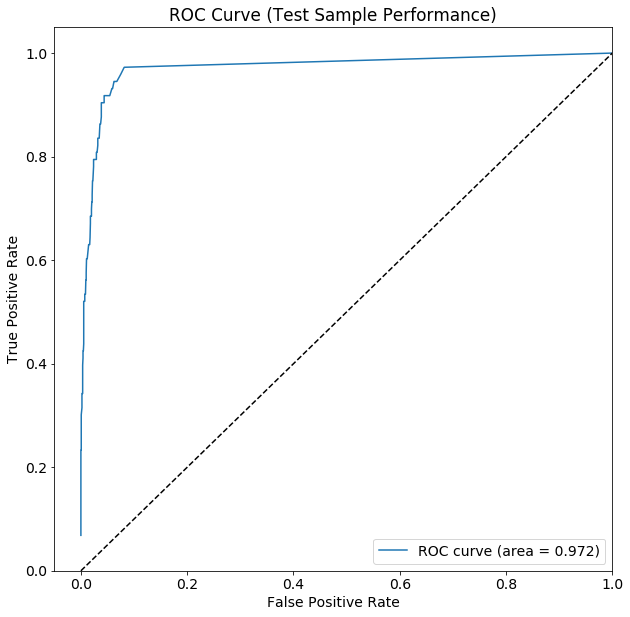

In [99]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

probsBag = bag.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, probsBag)
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
    
import matplotlib.pyplot as plt   
plt.rc("font", size=14)
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [54]:
### zu wiederholung vorher
#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)


#print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


#sm = SMOTE(random_state=34)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

#print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [100]:
from imblearn.over_sampling import SMOTE # über Terminal: pip install -U imbalanced-learn
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
#print(sorted(counter(y_resampled).items()))

In [101]:
counter_y=collections.Counter(y_resampled)
print(counter_y)

Counter({0: 1503, 1: 1503})


In [104]:
treeSmote = DecisionTreeClassifier()
bagSmote = BaggingClassifier(treeSmote, n_estimators=100,
                        random_state=1234)

bagSmote.fit(X_resampled, y_resampled)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1234, verbose=0, warm_start=False)

In [105]:
ypredSmote = bagSmote.predict(X_test)
pd.crosstab(ypredSmote,y_test)

target,0,1
row_0,,
0,1472,18
1,37,55


In [106]:
bagSmote.score(X_test, y_test) 

0.9652338811630847

ROC AUC: 0.963


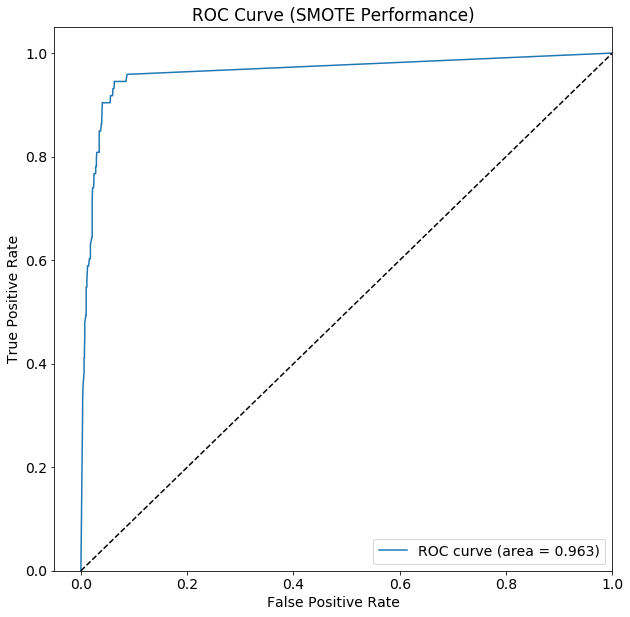

In [109]:
probsBagSmote = bagSmote.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, probsBagSmote)
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
    
import matplotlib.pyplot as plt   
plt.rc("font", size=14)
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE Performance)')
plt.legend(loc="lower right")
plt.show()